# Week 11: Linear Regression

## March 27, 2024

**Michael Jongho Moon**

## Exam Info

<div style="float:left; width:45%;">
<ul>
<li>Final Exam is on Saturday, April 20, 2024 from 2 pm ET to 5 pm ET.</li>
<li>The final exam will be written in a supervised, in-person setting, in computer labs on campus. We're still finalizing the room assignments, and will post a new announcement with room assignments next week. You can ignore the EX310 listed on  the FAS site; it will be updated soon as well.</li>
<li>Bring your Tcard or some other form of government ID.</li>
<li>You must remain in the lab while writing the exam (i.e., you cannot go grab a coffee/food during the exam).</li>
</ul>
</div>
<div style="float:left; width:45%;">
<ul>
<li>Each student will use a lab computer, <em>not their own laptop,</em> to complete the exam.</li>
<li>You'll login with your UTORid and password, and will also need your U of T email address to login to JupyterHub.</li>
<li>The exam will be semi-open book. You'll have access to the EEB125 course website, JupyterHub (including all of your course work from the semester), and MarkUs. However, you won't have access to any other websites (e.g., Quercus, Google, Facebook), and of course will not be allowed to communicate with anyone else during the exam.</li>
</ul>
</div>

## Course Evaluations

<img src="evals.png" width="400" style="float:left; margin: 0px 25px;"> 

Course evaluations are until April 10.

## Data Science Methods

**Hypothesis testing** covered how to:
+ test if a percentage (statistic) is different from some hypothesized values.
+ test if two different groups have different means (or median).

**Confidence intervals** covered how to:
+ get a range of values which estimate a parameter (i.e., mean, median, percentage).
+ get a range of values which estimate the difference in means (or medians) of two different groups.

**Linear regression** we covered how to:
+ look at the relationship between two columns in a data frame. (e.g., the relationship between height and mass of mammals).

## Linear Regression

### Basic idea

- Linear regression is a useful technique for creating models to explain relationships between variables. 

- The dependent variable must be numeric, and have meaningful numeric values. 

- The independent variables can be interval or categorical variables.

Essentially we have some data and want to estimate the line. 

<img src="line.png" width="400" style="float:left; margin: 5px 25px;">

We call the estimated line $\hat{Y} = b_0 + b_1 X$, where:
+ $b_0$ is the estimated y-intercept
+ $b_1$ is the estimated slope

<img src="lines.png" width="400" style="float:left; margin: 5px 25px;">

Specifically, we are looking for the slope to be non-zero, to have an analytical relationship between the independent and dependent variables. 

**Recall, the summary table will output a p-value for testing: $H_0: slope = 0$.**

Thus, if the p-value is small there is evidence against the hypothesis.

+ if the p-value is small then we say that analytically, there is evidence that the slope is not 0. Implying there is a relationship between the independent and dependent variable.
+ if the p-value is large then we say that analytically, there is evidence that the slope is 0. Implying there is not a relationship between the independent and dependent variable.

### Example 3: Close to linear - from last week

- Last week in Example 3 we did a linear regression on data that was almost perfectly linear
- Let's build on this example to assess whether the model is appropriate.

In [69]:
import pandas as pd
import numpy as np

In [70]:
np.random.seed(2024) # set the seed so that it's reproducible

data = {"depvar" : np.arange(start=0, stop=8, step=1) + 2,
        "indvar" : np.arange(start=0, stop=8, step=1) + np.random.uniform(low=0, high=2, size=8)}

df = pd.DataFrame(data)

df

,depvar,indvar
0,2,1.176029
1,3,2.398217
2,4,2.376304
3,5,3.087617
4,6,4.410038
5,7,5.212126
6,8,7.454480
7,9,8.358801


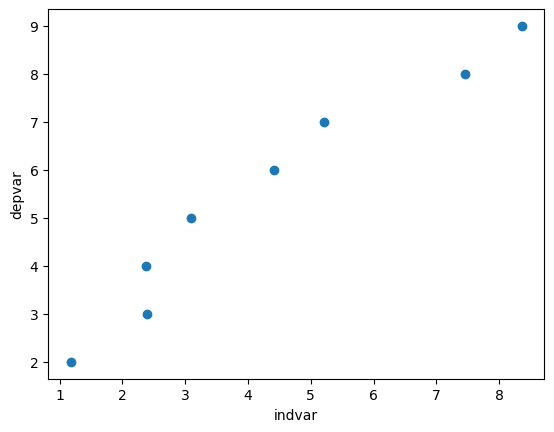

In [71]:
import matplotlib.pyplot as plt 

plt.scatter(x=df["indvar"], y=df["depvar"])
plt.xlabel("indvar")
plt.ylabel("depvar");

In [72]:
import statsmodels.formula.api as smf

regmod = smf.ols("depvar ~ indvar", data=df) # setup the model

regmod_fit = regmod.fit() # estimate/fit the model 

regmod_fit.params # get parameter estimates

Intercept    1.484180
indvar       0.931917
dtype: float64

So, now the relationship isn't perfectly linear, but close.  The equation of this regression line is:

$$\texttt{depvar} = 1.4842 + 0.9319 \times \texttt{indvar}$$

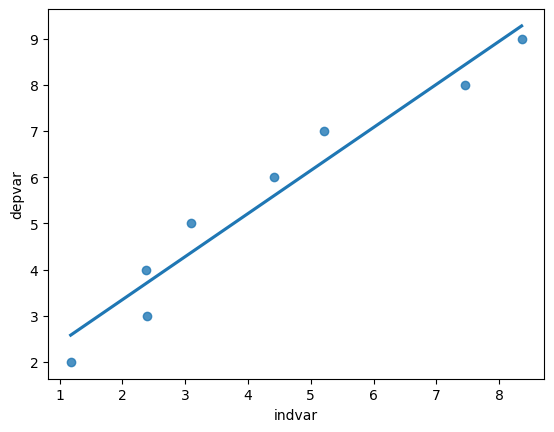

In [73]:
import seaborn as sns

sns.regplot(x="indvar", y="depvar", data=df, ci=None);

The `regplot()` function in the `seaborn` library will produce a scatter plot with the regression line.

The parameters of `regplot()`

- `x` is the independent variable.
- `y` is the dependent variable.
- `ci=None` specifies no confidence interval for the regression line 

### Predicted values and residuals

If the values of the independent variable are plugged into the regression equation then we obtain the fitted values.

$$\texttt{depvar} = 1.4842 + 0.9319 \times \texttt{indvar}$$

In [74]:
df

,depvar,indvar
0,2,1.176029
1,3,2.398217
2,4,2.376304
3,5,3.087617
4,6,4.410038
5,7,5.212126
6,8,7.454480
7,9,8.358801


The fitted value for the first row of `df` is:

In [75]:
1.4842 + 0.9310 * 1.1760

2.579056

- If the linear regression model is used on an independent variable that is not in the data set used to build the model then it's often referred to as a predicted value.

In [76]:
1.4842 + 0.9310 * 9 # e.g., independent variable at 9

9.8632

To extract the fitted values from a regression model use the `fittedvalues` function in `statsmodels`.

In [77]:
regmod_fit.fittedvalues

0    2.580142
1    3.719121
2    3.698699
3    4.361584
4    5.593971
5    6.341451
6    8.431140
7    9.273893
dtype: float64

The **residual** is how far above or below the line a point is. So, it is the dependent variable minus the fitted value.  

So, for the first row the residual is:

In [78]:
2 - 1.9581414431

0.041858556900000066

Below is what a residual plot looks like, in comparison to the scatterplot (with the line of best fit overlaidon top of it).

<img src="residuals_explain.png" width="400">

To extract the residuals from a regression model use the `resid` function in `statsmodels`.

In [79]:
regmod_fit.resid

0   -0.580142
1   -0.719121
2    0.301301
3    0.638416
4    0.406029
5    0.658549
6   -0.431140
7   -0.273893
dtype: float64

In [80]:
df["depvar"] - regmod_fit.fittedvalues

0   -0.580142
1   -0.719121
2    0.301301
3    0.638416
4    0.406029
5    0.658549
6   -0.431140
7   -0.273893
dtype: float64

Visualizing the **residuals** against the **fitted values** can reveal unwanted patterns.

Text(0, 0.5, 'residuals')

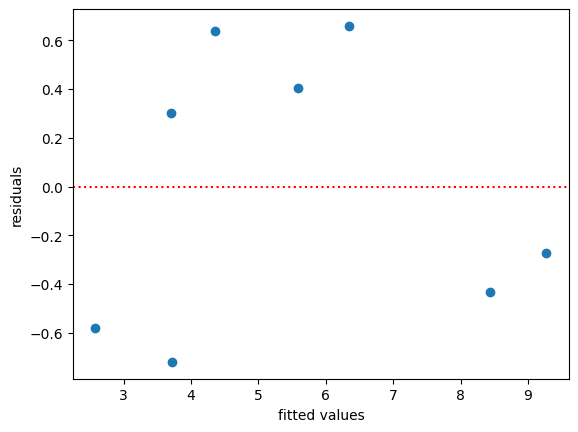

In [81]:
plt.scatter(regmod_fit.fittedvalues, regmod_fit.resid)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("fitted values")
plt.ylabel("residuals")

- If the linear regression model fits the data well then the residuals should be close to 0.

- One indication that the linear regression model fits well is to examine the **diagnostic** scatter plot of residuals versus fitted values.

- A plot that looks like a random scatter of points around 0 indicates that linear regression is an appropriate model.

- Since there are only 8 points it's hard to spot a pattern.

If the model is good/appropriate, the residuals shouldn't have a pattern not captured by the regression line/model.

We want a plot of the residuals to look like the first graphic below:

<img src="residuals.png" width="400">

## Accuracy of linear regression

- There are several measures of accuracy for linear regression.

- Popular measures are R-squared and root-mean squared error.

- R-squared can be calculated from a fitted model regression model using the `rsquared` function in `statsmodels`.

- R-squared is always between 0 and 1.  
     + R-squared of 0 indicates a poor fit
     + R-squared of 1 indicates a perfect fit

In [82]:
regmod_fit.rsquared

0.9473452032007467

## Regression model to estimate gestation using some combination of body mass and longevity

### Data

- pantheria data contains data on longevity and body mass.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

pantheria = pd.read_csv("pantheria.txt", sep="\t")
pantheria.head()

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,NaN,745.32,NaN,...,-17.53,13.00,0.0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,NaN,827.53,7.50,...,-17.05,45.74,0.0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,NaN,872.39,11.94,...,-168.12,-117.60,0.0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,NaN,1055.00,14.01,...,-171.84,3.90,0.0,37.87,0.0,0.04,34.79,4.82,313.33,561.11


### Disclaimer

+ In this example, we are showcasing some ways to "statistically" select a regression model.
+ There are lots of other approaches to select a regression model.
+ And selecting using *only* statistical output is usually not enough. i.e., usually you want to speak with a subject-matter expert to help avoid spurious findings and ensure that the model makes sense.

We will be interested in the following columns.

In [84]:
cols = ["5-1_AdultBodyMass_g", "17-1_MaxLongevity_m", "9-1_GestationLen_d", "MSW05_Binomial"]

panthdat = pantheria[cols]

colnames = {cols[0] : "bodymass",
            cols[1] : "longevity",
            cols[2] : "gestation",
            cols[3] : "name"}

panthdata = panthdat.copy()

panthdata.rename(columns=colnames, inplace=True)

panthdata.head()

,bodymass,longevity,gestation,name
0,492714.47,480.0,386.51,Camelus dromedarius
1,10392.49,137.0,65.00,Canis adustus
2,9658.70,192.0,61.24,Canis aureus
3,11989.10,262.0,61.74,Canis latrans
4,31756.51,354.0,63.50,Canis lupus


Let's look at the distribution of `"bodymass"`, `"longevity"`, and `"gestation"`.

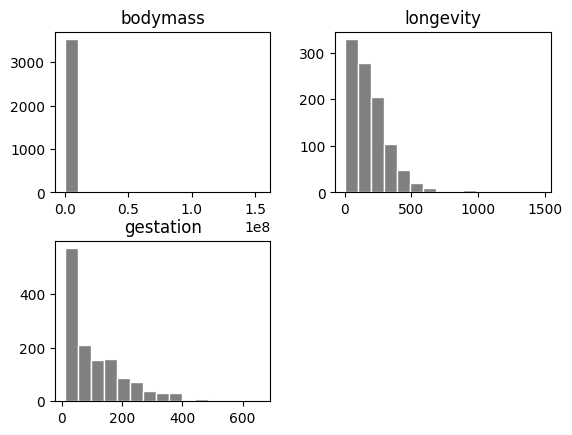

In [85]:
panthdata.hist(column=["bodymass", "longevity", "gestation"], 
               bins=15, color="grey", edgecolor="white", grid=False);

Last week we had estimated the line with gestation as the dependent variable and longevity as the independent variable.

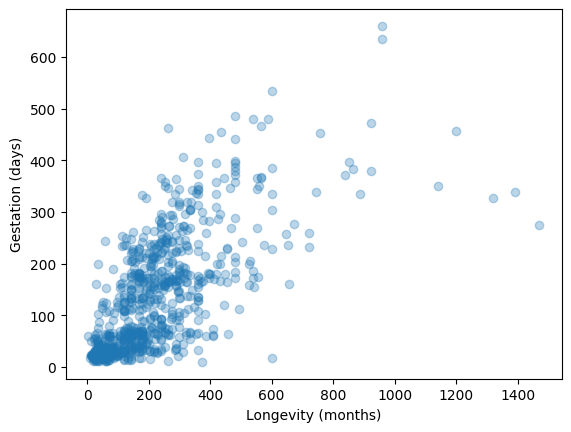

In [86]:
plt.scatter(y=panthdata["gestation"], x=panthdata["longevity"],
            alpha=.3) # helps display overlapping data values 
plt.xlabel("Longevity (months)")
plt.ylabel("Gestation (days)");

Now let's think about the line with gestation as the dependent variable and body mass as the independent variable.

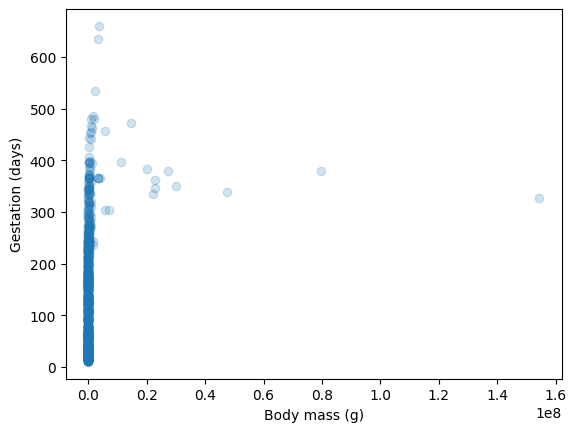

In [87]:
plt.scatter(y=panthdata["gestation"], x=panthdata["bodymass"], alpha=.2)
plt.xlabel("Body mass (g)")
plt.ylabel("Gestation (days)");

### Transform the data

+ This is a bit hard to interpret and the body mass v. gestation scatterplot looks non-linear. 

+ One way to deal with data that is clumped together on the left (right-skewed) is to transform the x-values using $\log_{e}(x)$ to stretch the clump on the left. 

+ Note: there are other ways to address this issue
     + e.g., maybe filter to only look at body mass between 0g and 0.1g, 
     + e.g., maybe take the y-values and transform them using $e^y$

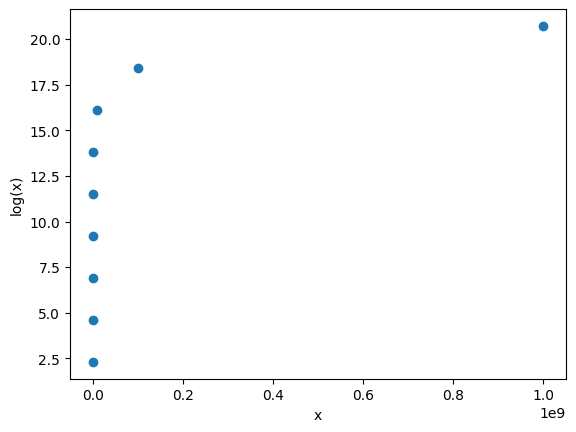

In [88]:
x = np.power(10, np.arange(start=1, stop=10, step=1))
logx = np.log(x)
plt.scatter(x=x, y=logx)
plt.xlabel("x")
plt.ylabel("log(x)");

We can compute $log(x)$ of each `"bodymass"` and `"longevity"` using `np.log()`.

In [89]:
np.log(panthdata[["bodymass", "longevity"]]).head()

,bodymass,longevity
0,13.107685,6.173786
1,9.248839,4.919981
2,9.175614,5.257495
3,9.391753,5.568345
4,10.365853,5.869297


In [90]:
panthdata[["bodymass_log", "longevity_log"]] = np.log(panthdata[["bodymass", "longevity"]])

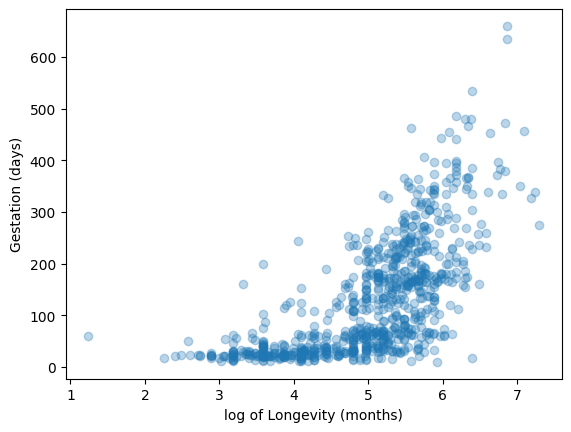

In [91]:
plt.scatter(y=panthdata["gestation"], x=panthdata["longevity_log"],
            alpha=.3) # helps display overlapping data values 
plt.xlabel("log of Longevity (months)")
plt.ylabel("Gestation (days)");

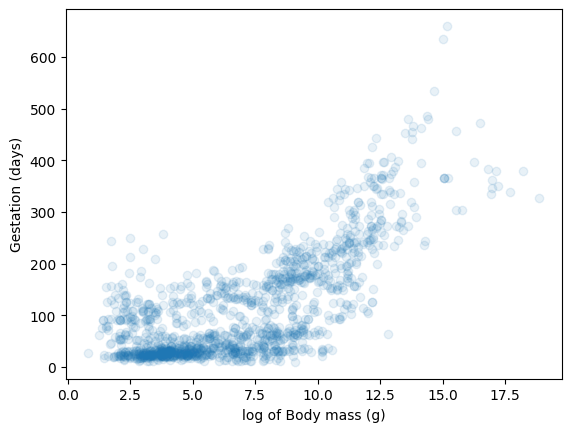

In [92]:
plt.scatter(y=panthdata["gestation"], x=panthdata["bodymass_log"], alpha=.1)
plt.xlabel("log of Body mass (g)")
plt.ylabel("Gestation (days)");

It will also be helpful to drop missing values.  This can be done using the `pandas` function `dropna` with the parameter `inplace=True`, so that it modifies the existing `DataFrame`.

In [93]:
panthdata.dropna(inplace=True)

print(panthdata.isna().sum()) # check for missing values

panthdata.head()

bodymass         0
longevity        0
gestation        0
name             0
bodymass_log     0
longevity_log    0
dtype: int64


,bodymass,longevity,gestation,name,bodymass_log,longevity_log
0,492714.47,480.0,386.51,Camelus dromedarius,13.107685,6.173786
1,10392.49,137.0,65.00,Canis adustus,9.248839,4.919981
2,9658.70,192.0,61.24,Canis aureus,9.175614,5.257495
3,11989.10,262.0,61.74,Canis latrans,9.391753,5.568345
4,31756.51,354.0,63.50,Canis lupus,10.365853,5.869297


## Regression Model 1: Length of longevity on gestation

### Fit the regression model

In [94]:
import statsmodels.formula.api as smf

reg_longgest = smf.ols("gestation ~ longevity", data=panthdata) # setup the model

reg_longgest_fit = reg_longgest.fit() # estimate/fit the model 

### Statistical summary of the regression model

In [95]:
reg_longgest_summ = reg_longgest_fit.summary()

reg_longgest_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.0398,4.341,8.993,0.000,30.519,47.561
longevity,0.4302,0.016,27.515,0.000,0.400,0.461


- The regression equation is: $\texttt{gestation} = 39.04 + 0.43\times \texttt{longevity}$
- The **slope** indicates that for a 1 month **increase** in longevity, we expect the gestational period to increase by 0.43 days.
- The **y-intercept** indicates that when longevity is 0 months, gestational period is 39 days.

+ The p-value for the slope is 0 indicating the slope is significantly different from 0.

### Accuracy of regression model

In [96]:
reg_longgest_fit.rsquared

0.48342601039767696

Text(0, 0.5, 'Residuals')

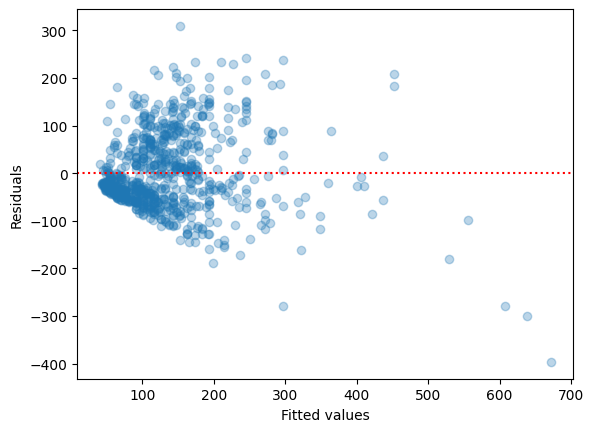

In [97]:
plt.scatter(x=reg_longgest_fit.fittedvalues , y=reg_longgest_fit.resid, alpha=.3)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

_What do you notice?_

## Regression Model 2: Log of length of longevity on gestation

In [98]:
reg_longgestlog = smf.ols("gestation ~ longevity_log", data=panthdata) # setup the model
reg_longgestlog_fit = reg_longgestlog.fit() # estimate/fit the model 
reg_longgestlog_summ = reg_longgestlog_fit.summary()
reg_longgestlog_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-279.9515,16.054,-17.439,0.000,-311.463,-248.440
longevity_log,81.9424,3.154,25.977,0.000,75.750,88.134


- The regression equation is: $\texttt{gestation} = -280 + 81.94\times \texttt{log.longevity}$
- The **slope** indicates that for a _____ month **increase** in longevity, we expect the gestational period to increase by 81.9 days.
- The **y-intercept** indicates that when longevity is _______ months, gestational period is -280.9 days, which isn't sensible.
- The p-value for the slope indicates that log of longevity has a non-zero slope when predicting gestation.

Let's take a look at the model's accuracy, by checking it's R squared and residuals.

In [99]:
reg_longgestlog_fit.rsquared

0.4547734755983328

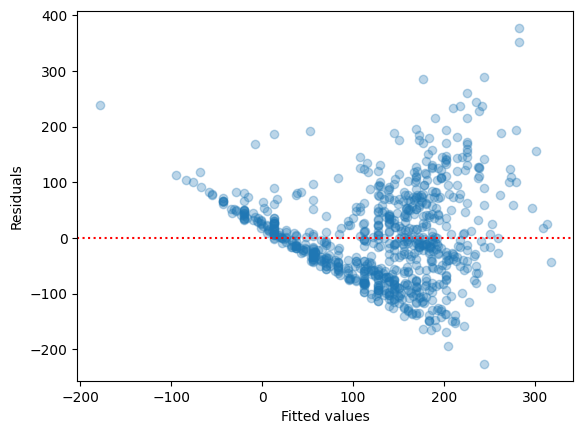

In [100]:
plt.scatter(x=reg_longgestlog_fit.fittedvalues , y=reg_longgestlog_fit.resid, alpha=.3)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals");

In [101]:
print("Model 1 R squared:", np.round(reg_longgest_fit.rsquared, 3))
print("Model 2 R squared:", np.round(reg_longgestlog_fit.rsquared, 3))

Model 1 R squared: 0.483
Model 2 R squared: 0.455


The $R^2$ of model 2 is lower than model 1 and the residuals look worse in model 2. So we should probably stick with model 1 (`longevity`) in lieu of model 2 (`longevity_log`). 

How else can we improve the model?

## Regression Model 3: Body mass on gestation


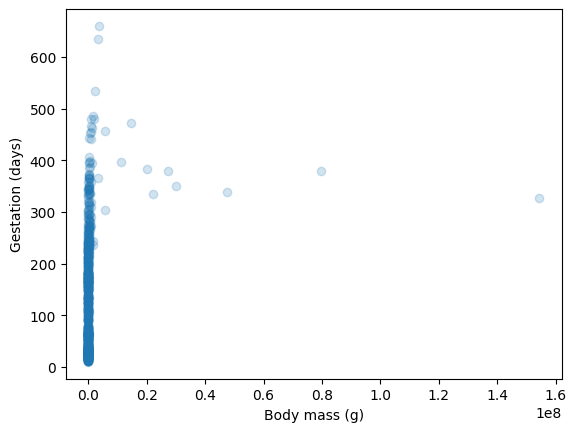

In [102]:
## Recall the scatterplot didn't look great
plt.scatter(y=panthdata["gestation"], x=panthdata["bodymass"], alpha=.2)
plt.xlabel("Body mass (g)")
plt.ylabel("Gestation (days)");

In [103]:
reg_gestbm = smf.ols("gestation ~ bodymass", data=panthdata) # setup the model
reg_gestbm_fit = reg_gestbm.fit() # estimate/fit the model 
reg_gestbm_summ = reg_gestbm_fit.summary()
reg_gestbm_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,128.4941,3.846,33.412,0.000,120.945,136.043
bodymass,3.078e-06,5.82e-07,5.291,0.000,1.94e-06,4.22e-06


- The regression equation is: $\texttt{gestation} = 128 + 0.00000308 \times \texttt{body.mass}$
- The p-value for the slope indicates that body mass has a non-zero slope when predicting gestation.

In [104]:
reg_gestbm_fit.rsquared

0.03344474332822689

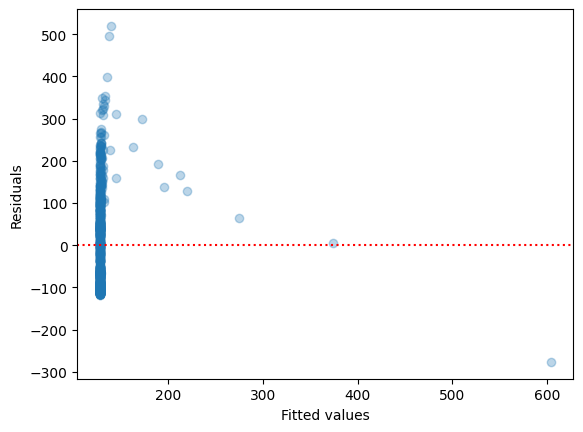

In [105]:
plt.scatter(x=reg_gestbm_fit.fittedvalues , y=reg_gestbm_fit.resid, alpha=.3)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals");

The same issue in the scatterplot is showing in the residual plot. But specifically, there is inconsistent variance so this model is not appropriate. 

## Regression Model 4: Log of body mass on gestation

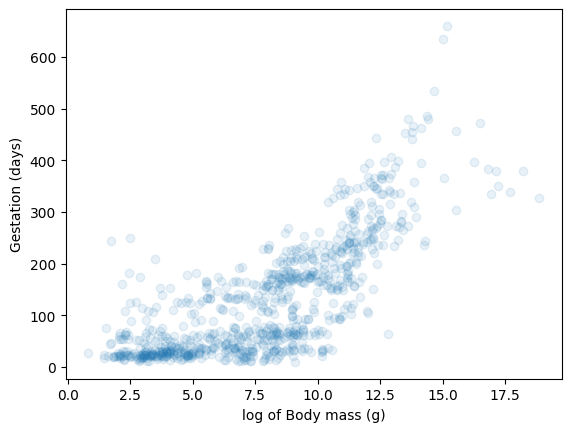

In [106]:
## Recall the scatterplot
plt.scatter(y=panthdata["gestation"], x=panthdata["bodymass_log"], alpha=.1)
plt.xlabel("log of Body mass (g)")
plt.ylabel("Gestation (days)");

In [107]:
reg_gestbmlog = smf.ols("gestation ~ bodymass_log", data=panthdata) # setup the model
reg_gestbmlog_fit = reg_gestbmlog.fit() # estimate/fit the model 
reg_gestbmlog_summ = reg_gestbmlog_fit.summary()
reg_gestbmlog_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-65.2383,6.322,-10.318,0.000,-77.649,-52.828
bodymass_log,24.8855,0.738,33.706,0.000,23.436,26.335


- The regression equation is: $\texttt{gestation} = -65 + 25 \times \texttt{log.body.mass}$
- The p-value for the slope is still significant (comparing to model 3). So log body mass has a non-zero slope when predicting gestation.

In [108]:
reg_gestbmlog_fit.rsquared

0.5840782422545432

Text(0, 0.5, 'Residuals')

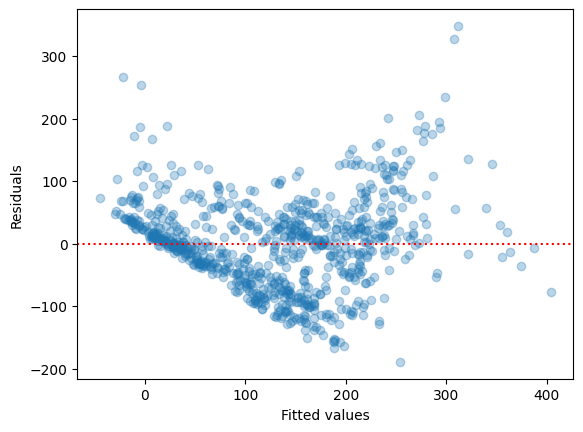

In [109]:
plt.scatter(x=reg_gestbmlog_fit.fittedvalues , y=reg_gestbmlog_fit.resid, alpha=.3)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

+ Still not perfect, but this looks better than the model 3 residual plot.

## Regression Model 5

### Multiple regression with longevity and log body mass


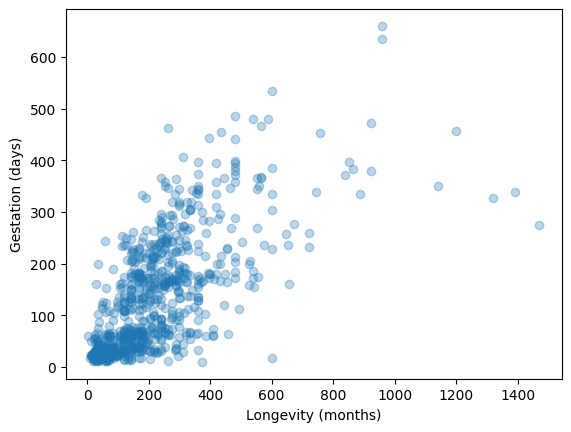

In [110]:
## Recall the scatterplot for longevity and gestation (model 1)
plt.scatter(y=panthdata["gestation"], x=panthdata["longevity"], alpha=.3) 
plt.xlabel("Longevity (months)")
plt.ylabel("Gestation (days)");

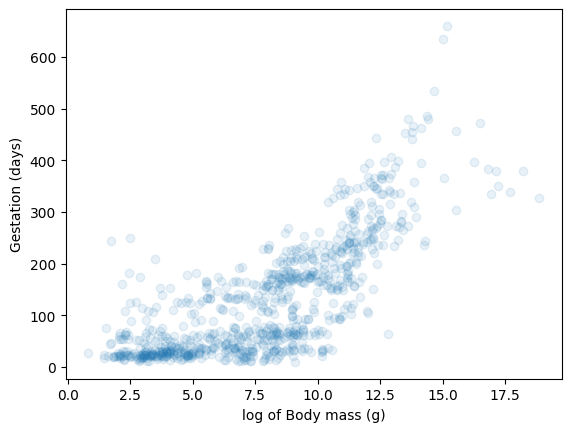

In [111]:
## Recall the scatterplot for log body mass and gestation (model 4)
plt.scatter(y=panthdata["gestation"], x=panthdata["bodymass_log"], alpha=.1)
plt.xlabel("log of Body mass (g)")
plt.ylabel("Gestation (days)");

In [112]:
reg_mod5 = smf.ols("gestation ~ longevity + bodymass_log", data=panthdata) # setup the model
reg_mod5_fit = reg_mod5.fit() # estimate/fit the model 
reg_mod5_summ = reg_mod5_fit.summary()
reg_mod5_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-50.6390,6.057,-8.360,0.000,-62.529,-38.749
longevity,0.1978,0.018,10.898,0.000,0.162,0.233
bodymass_log,17.6879,0.955,18.522,0.000,15.813,19.562


- The regression equation is: $\texttt{gestation} = \text{___} + \text{___} \times \texttt{longevity}+ \text{___} \times \texttt{log.body.mass}$
- The **slope** of longevity indicates that for every 1 month **increase** in longevity, _while keeping body mass constant_, we expect the gestational period to increase by _____ days.
- The **slope** of log body mass indicates that for every 1 unit **increase** in log body mass, _while keeping longevity length constant_, we expect the gestational period to increase by _____ days.
- The **y-intercept** indicates that when longevity is 0 months and log body mass is 0, gestational period is _____ days.

- Note: both slopes have small p-values, meaning they are both helpful inpredicting gestational length in the model.

In [113]:
reg_mod5_fit.rsquared

0.6373811761507796

Text(0, 0.5, 'Residuals')

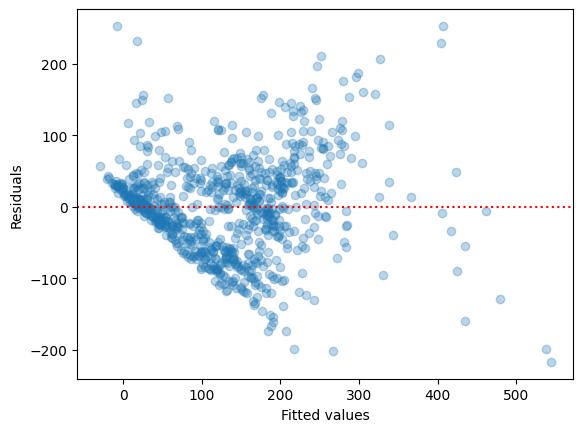

In [114]:
plt.scatter(x=reg_mod5_fit.fittedvalues , y=reg_mod5_fit.resid, alpha=.3)
plt.axhline(y=0, color="red", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

The residuals of model 5 aren't great. They are showing similar issues to the residual plots of models 1 and 4. 

## Comparing Models 1, 4 and 5

+ Residual plots of all 3 show similar attributes.
+ $R^2$ of model 5 is highest.

+ p-values of all slopes indicate non-zero relationships in models 1, 3 and 5; it suggests that the two independent variables together have non-zero linear relationship with gestation. 
+ Note that a lower p-value doesn't indicate a more accurate model. Each p-value for the slopes indicates whether there is evidence for a non-zero linear relationship.

Probably stick with model 5, which uses both longevity and log of body mass to make predictions of gestational period.

### Conclusions when trying to model gestation:

- The regression equation is: $\texttt{gestation} = -50.6 + 0.2\times \texttt{longevity}+ 17.7\times \texttt{log.body.mass}$
- The **slope** of longevity indicates that for every 1 month **increase** in longevity, while keeping body mass constant, we expect the gestational period to increase by 0.2 days.
- The **slope** of log body mass indicates that for every 1 unit **increase** in log body mass, while keeping longevity length constant, we expect the gestational period to increase by 17.7 days.
- The **y-intercept** indicates that when longevity is 0 months and log body mass is 0, gestational period is -50.6 days.

## Causality

Recall that **correlation does not imply causation**. All data we analyzed are observational, and has hidden/confounding variables that may be leading the relationship.

+ e.g., our results show that (log) body mass has a positive relationship with gestation length, but that does not mean that body mass itself is **causing** gestational period to increased.

+ What is an example of a confounding/hidden variable in this relationship?

### Potential outcomes and randomized control trials

+ Establishing causality involves comparing **potential outcomes**.  
+ The problem is that we can never observe all (log) body masses and the resulting gestational length (in the same animal at the same time under the same conditions).
+ Randomized control trials are studies (usually on human subjects) where we randomly assign subjects to different options (e.g., medication vs placebo) and then compare the outcomes; the idea is that if people are randomly assigned, there should be balance in the confounding variables.
+ Randomized control trials are considered the gold standard way to explore a causal relationship (from a statistical perspective).

## Alternative for Model Selection

### Training vs Testing

- Ideally we could assess the accuracy of this linear regression model on a new set of data (i.e., longevity in species from another study). 

- But, we don't have this data.

- One trick that data scientists use to fit the model on part of the data (training data) and use the remaining part (testing data) to test the accuracy.

- If we only have one data set then the training data can be obtained by randomly selecting rows from the data to fit the regression model, then the remaining rows can be used to test the accuracy of the model.

### Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat{y}_i-y_i)^2}{n}}$$

i.e., the "average" of the residuals.



+ We want RMSE to be small.
+ We do NOT want RMSE of training data to be much smaller than the RMSE of test data, since we are likely overfitting - fit to the current sample but not to the general population.

### Splitting a `pandas` `DataFrame` by `index`

In [115]:
data = {'a' : [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

df.index

RangeIndex(start=0, stop=5, step=1)

A Boolean array that is `True` if the index is `0` or `1` and `False` otherwise. 

In [116]:
df.index.isin([0,1])

array([ True,  True, False, False, False])

To create a Boolean series that is `False` if the index is `0` or `1` and `True` otherwise we can negate `df.index.isin([0,1])` this Boolean series using the `~` operator `~df.index.isin([0,1])`

In [117]:
~df.index.isin([0,1])

array([False, False,  True,  True,  True])

In [118]:
df[~df.index.isin([0,1])]

,a
2,3
3,4
4,5


### Creating training and test data sets from a single dataset

### Step 1: 

- Split the data into a training set with 75% of the rows.

- Use the remaining 25% of the data for testing. 

In [119]:
np.random.seed(11) # for reproducibility

# randomly select 75% of neighbourhoods; we don't want to replace rows
reg_df_train = panthdata.sample(frac=0.75, replace=False) 

# get index of training data
train_index = reg_df_train.index

- Exclude indicies from `reg_df_train` using `pandas` `isin` function. 

In [120]:
# exclude rows in training to define test data
reg_df_test = panthdata[~panthdata.index.isin(train_index)]

print(panthdata.shape)

print(reg_df_train.shape)

print(reg_df_test.shape)

(811, 6)
(608, 6)
(203, 6)


### Step 2: Fit the regression model on the training data

In [121]:
reg_train = smf.ols("gestation ~ longevity", data=reg_df_train) # setup the model

reg_train_fit = reg_train.fit() # estimate/fit the model 

### Step 3: Compute predicted (fitted) values using training data 

In [122]:
# use the model fit on the training data to predict longevity rates
# from the test set. 

predvalues_train = reg_train_fit.predict(reg_df_train["longevity"])

### Step 4: Evaluate accuracy using root mean-squared error on training data

- Another measure of accuracy of regression models.

- Compares observed values of the dependent variable with the predicted values.

- It can be computed using the `rmse()` function from `statsmodels`.

 Compute root mean-squared error for the training data.

In [123]:
from statsmodels.tools.eval_measures import rmse

# compute the accuracy of these predictions
rmse(predvalues_train,          # predicted values
     reg_df_train["gestation"]) # observed values

78.00487154699478

In [126]:
# computing it "manually"
np.sqrt(                   # root
    np.mean(               # mean
        np.power(          # squared
            predvalues_train - reg_df_train["gestation"], # error
        2)))

78.00487154699478

- The observed gestational periods deviate from the predictted values for each species by 78 days in the training set.

- Is this an acceptable prediction error?

- Let's examine the accuracy of the linear regression model on the test set

- First compute the predicted values using the test data.

### Step 5: Evaluate the accuracy of regression model on the test data using root mean-squared error

- Compute predictions using test data

In [124]:
predvalues_test = reg_train_fit.predict(reg_df_test["longevity"])

- Now compute the root mean-squared error for the test data using the model fit on the training data.

In [125]:
rmse(predvalues_test, reg_df_test["gestation"])

84.78871387646602

## Note of caution

+ In this class we discussed how to "statistically" select a model, but model selection should consider more than the statistical measures. 
+ e.g., if you want to answer "What is the relationship between hours slept and grade on the exam, controlling for other factors?" then you need to have _"hours slept"_ in your model while you may be able to add or remove _"other factors"_.

+ Having a team to bounce ideas off of, and collaborate is a good idea.

+ If you aren't sure of something reach out to a data scientist/statistician. The [Data Sciences Institute](https://datasciences.utoronto.ca/) has lots of resources.

## Overview

You are now able to:
- perform a hypothesis test which assess if a percentage is different/greater than/less than some number.  
e.g. "Is the percentage of educated citizens greater than 10%?"
- perform a hypothesis test which assesses if the mean (or median) of one group are different/greater than/less than the mean (or median) of another group.  
e.g. "do women have a higher GPA than men?"
- produce a plausible range of values for a certain metric of interest.  
e.g., "What is the 95% confidence interval for the median body mass of mammals?"
- perform a multiple linear regression to look at the relationship between two or more numeric columns.  
e.g., "What is the relationship between heights and body weights of mammals?"

A [practice exercise set](../exercise/exercise11.ipynb) is available with sample solutions.